In [1]:
from precession import Precession
from lensing import Lensing
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
solar_mass = 4.92624076 * 1e-6 #[solar_mass] = sec
giga_parsec = 1.02927125 * 1e17 #[giga_parsec] = sec
year = 31557600 #[year] = sec

default_precession_params = {
    'theta_S' : np.pi/4, 
    'phi_S' : 0., 
    'theta_J' : np.pi/3, 
    'phi_J' : np.pi/5, 
    'mcz' : 10 * solar_mass, 
    'dist': 1.5 * giga_parsec, 
    'eta' : 0.25, 
    'tc' : 0.0, 
    'phi_c' : 0.0,
    'theta_tilde': 6.,
    'omega_tilde': 4.,
    'gamma_P': 0.
}

def_prece = Precession(default_precession_params)

### Non precessing case

In [3]:
nonprecession_init = Precession(default_precession_params)
f_cut = nonprecession_init.get_f_cut()
f_range = np.linspace(20, f_cut, 10000)
amp_NP = nonprecession_init.amplitude(f_range)
# plt.plot(f_range, amp_NP)

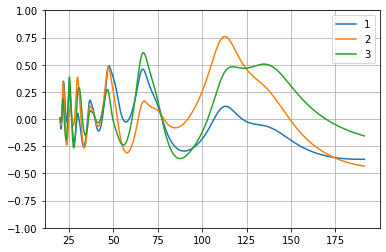

In [6]:
omega_tilde_range = np.array([1, 2, 3])

for i in range(len(omega_tilde_range)):
    precession_params = default_precession_params
    precession_params['omega_tilde'] = omega_tilde_range[i]
    precession_params['theta_tilde'] = 5.
    precession_init = Precession(precession_params)

    f_cut = precession_init.get_f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_P_theta_tilde = precession_init.amplitude(f_range)
    ratio_amp_theta_tilde = amp_P_theta_tilde/amp_NP
    plt.plot(f_range, ratio_amp_theta_tilde-1, label=f'{omega_tilde_range[i]}')
    plt.ylim(-1, 1)
    plt.legend()
    plt.grid()

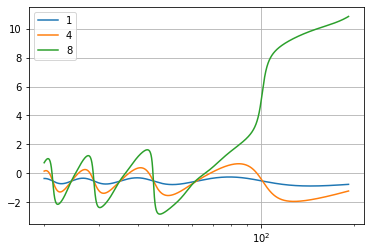

In [7]:
theta_tilde_range = np.array([1, 4, 8])

for i in range(len(theta_tilde_range)):
    precession_params = default_precession_params
    precession_params['theta_tilde'] = theta_tilde_range[i]
    precession_params['omega_tilde'] = 2.
    precession_init = Precession(precession_params)

    f_cut = precession_init.get_f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    phase_P_omega_tilde = precession_init.phase_phi_P(f_range)
    plt.semilogx(f_range, phase_P_omega_tilde, label=f'{theta_tilde_range[i]}')
    # plt.ylim(-1, 1)
    plt.legend()
    plt.grid()

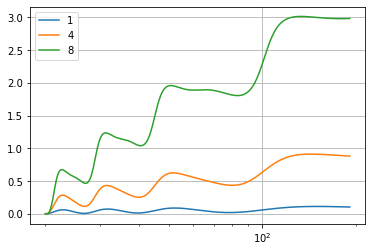

In [6]:
theta_tilde_range = np.array([1, 4, 8])

for i in range(len(theta_tilde_range)):
    precession_params = default_precession_params
    precession_params['theta_tilde'] = theta_tilde_range[i]
    precession_params['omega_tilde'] = 2.
    precession_init = Precession(precession_params)

    f_cut = precession_init.get_f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    phase_phi = precession_init.phase_delta_phi(f_range)
    plt.semilogx(f_range, phase_phi, label=f'{theta_tilde_range[i]}')
    # plt.ylim(-1, 1)
    plt.legend()
    plt.grid()

In [26]:
default_lensing_params = {
    'theta_S' : 0., 
    'phi_S' : 0., 
    'theta_L' : 0., 
    'phi_L' : 0., 
    'mcz' : 10 * solar_mass, 
    'dist': 1.5 * giga_parsec, 
    'eta' : 0.25, 
    'tc' : 0.0, 
    'phi_c' : 0.0,
    'y': 0.8,
    'MLz': 1e3 * solar_mass
}

def_lens = Lensing(default_lensing_params)

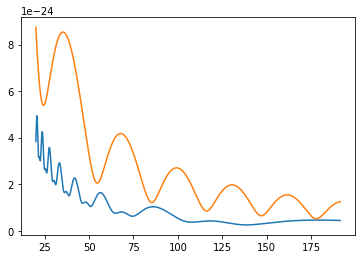

In [32]:
f_cut = def_prece.get_f_cut()
f_range = np.linspace(20, f_cut, 10000)
# lensing strain
amp_fact = def_lens.F(f_range)
unlensed_strain = def_lens.hI(f_range)
lensed_strain = amp_fact * unlensed_strain

# precessing strain
precessing_strain = def_prece.precessing_strain(f_range)


plt.plot(f_range, np.abs(precessing_strain))
plt.plot(f_range, np.abs(lensed_strain))